## Import all the requiered libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns

import torch
from torch.autograd import Variable
import torch.utils.data as Data
import torch.nn as nn

## Explore and prepare the dataset

In [2]:
df = pd.read_csv("dataset/dataset_membrane_.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SW         5216 non-null   float64
 1   MWCO       5216 non-null   int64  
 2   CA         5216 non-null   int64  
 3   ZP         5216 non-null   float64
 4   Permeance  5216 non-null   float64
 5   Rejection  5216 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 244.6 KB


In [4]:
df.head(5)

,SW,MWCO,CA,ZP,Permeance,Rejection
0,1.50778,350,87,-15.0,48.058984,0.742500
1,1.50778,350,87,-15.0,48.058984,0.351755
2,1.50778,350,87,-15.0,48.058984,0.364472
3,1.50778,350,87,-15.0,48.058984,0.232885
4,1.50778,350,87,-15.0,48.058984,0.098254


In [5]:
type(df['ZP'][0])

numpy.float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5216 entries, 0 to 5215
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SW         5216 non-null   float64
 1   MWCO       5216 non-null   int64  
 2   CA         5216 non-null   int64  
 3   ZP         5216 non-null   float64
 4   Permeance  5216 non-null   float64
 5   Rejection  5216 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 244.6 KB


**Permeance and Rejection are our target values, labels, or the numbers that we want to predict with our neural network. As a result, we will separate the Permeance and Rejection columns into another df.**

In [7]:
X = df.drop(['Permeance', 'Rejection'], axis=1)
y = df[['Permeance', 'Rejection']]
y1 = df['Permeance']
y2 = df['Rejection']
y1.head(5)

0    48.058984
1    48.058984
2    48.058984
3    48.058984
4    48.058984
Name: Permeance, dtype: float64

In [8]:
pmc_min = y1.min()
pmc_max = y1.max()
pmc_avg = y1.mean()
pmc_std = y1.std()

In [9]:
summary = {'Statistics of Permeance': [pmc_min, pmc_max, pmc_avg, pmc_std]}
stat_pmc = pd.DataFrame(data=summary, index=['Min', 'Max','Avg','Std'])
stat_pmc

,Statistics of Permeance
Min,0.066138
Max,64.754339
Avg,3.312112
Std,9.011480


<AxesSubplot:>

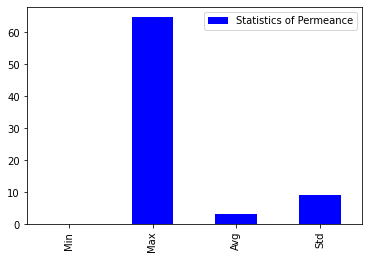

In [10]:
stat_pmc.plot(kind='bar', color='blue')

**Lets use Min Max Normalization to normalize all the six features, transforming their values into a scale between 0 and 1.**

In [11]:
def normalize(dataset):
    data_normalized = ((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return data_normalized

In [12]:
features = normalize(X)
features

,SW,MWCO,CA,ZP
0,0.454667,0.571429,1.0,0.616438
1,0.454667,0.571429,1.0,0.616438
2,0.454667,0.571429,1.0,0.616438
3,0.454667,0.571429,1.0,0.616438
4,0.454667,0.571429,1.0,0.616438
...,...,...,...,...
5211,1.000000,0.142857,0.0,0.616438
5212,1.000000,0.142857,0.0,0.616438
5213,1.000000,0.142857,0.0,0.616438
5214,1.000000,0.142857,0.0,0.616438


## Pandas series to Numpy arrays

In [13]:
numpy_X = features[['SW','MWCO', 'CA', 'ZP']].to_numpy()
numpy_X[:5]

array([[0.45466716, 0.57142857, 1.        , 0.61643836],
       [0.45466716, 0.57142857, 1.        , 0.61643836],
       [0.45466716, 0.57142857, 1.        , 0.61643836],
       [0.45466716, 0.57142857, 1.        , 0.61643836],
       [0.45466716, 0.57142857, 1.        , 0.61643836]])

In [14]:
numpy_y = y.to_numpy()
numpy_y1 = y1.to_numpy()
numpy_y2 = y2.to_numpy()
numpy_y1[:5]

array([48.05898411, 48.05898411, 48.05898411, 48.05898411, 48.05898411])

## Create a train (80%) and a test (20%) set 

In [15]:
train_X, test_X, train_y, test_y, train_y1, test_y1, train_y2, test_y2 = train_test_split(numpy_X, numpy_y, numpy_y1, numpy_y2, test_size=0.20, random_state=0)
# Print the shapes of the train and test sets to verify the split
print("X_train shape:", train_X.shape)
print("X_test shape:", test_X.shape)
print("y_train shape:", train_y.shape)
print("y_test shape:", test_y.shape)
print("y1_train shape:", train_y1.shape)
print("y1_test shape:", test_y1.shape)
print("y2_train shape:", train_y2.shape)
print("y2_test shape:", test_y2.shape)

X_train shape: (4172, 4)
X_test shape: (1044, 4)
y_train shape: (4172, 2)
y_test shape: (1044, 2)
y1_train shape: (4172,)
y1_test shape: (1044,)
y2_train shape: (4172,)
y2_test shape: (1044,)


## Numpy arrays to Pytorch tensors train

In [16]:
# this is for the train set.
tensor_X = torch.from_numpy(train_X).float() 
tensor_y = torch.from_numpy(train_y).float() 
tensor_y1 = torch.from_numpy(train_y1).float()
tensor_y2 = torch.from_numpy(train_y2).float()
print(tensor_X.shape, tensor_y.shape, tensor_y1.shape, tensor_y2.shape)

torch.Size([4172, 4]) torch.Size([4172, 2]) torch.Size([4172]) torch.Size([4172])


In [17]:
tensor_y = tensor_y.unsqueeze(1)
tensor_y1 = tensor_y1.unsqueeze(1)
tensor_y2 = tensor_y2.unsqueeze(1)
print(tensor_X.shape, tensor_y.shape, tensor_y1.shape, tensor_y2.shape)

torch.Size([4172, 4]) torch.Size([4172, 1, 2]) torch.Size([4172, 1]) torch.Size([4172, 1])


In [18]:
torch_dataset = Data.TensorDataset(tensor_X, tensor_y)
torch_dataset1   = Data.TensorDataset(tensor_X, tensor_y1)
torch_dataset2 = Data.TensorDataset(tensor_X, tensor_y2)

## Define a dataloader to load it in batches

In [19]:
batch = 47 # batch size

In [20]:
loader = Data.DataLoader(
    dataset = torch_dataset1,      # torch TensorDataset format
    batch_size = batch,           # mini batch size
    shuffle=True,                 # random shuffle for training
    num_workers=2,                # subprocesses for loading data
)

## Define a nn, optimizer, and loss function

In [21]:
model = nn.Sequential(nn.Linear(4, 30), # first layer
   nn.ReLU(),
   nn.Linear(30, 20), # second layer
   nn.ReLU(),
   nn.Linear(20, 10), # third layer
   nn.ReLU(),
   nn.Linear(10, 5), # fourth layer
   nn.ReLU(),
   nn.Linear(5, 1)   # five layer
   )

In [22]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.007)
loss_function = torch.nn.MSELoss()

## Train our Artificial Neural Network

In [23]:
loss_lst = []
for epoch in range(1, 101):
    batch = 1
    print("Epoch", epoch)
    for step, (batch_x, batch_y) in enumerate(loader): 
        var_X, var_y = Variable(batch_x), Variable(batch_y)
        prediction = model(var_X)
        rmse_loss = torch.sqrt(loss_function(prediction, var_y))

        optimizer.zero_grad()
        rmse_loss.backward()
        optimizer.step()
        
        loss_lst.append(float(rmse_loss))
        print("Epoch: ", epoch,"Batch: ", batch, ", loss: ", rmse_loss)
        batch += 1
    print("Result of the last epoch's batch: ", rmse_loss)
    print(' ')

or(3.4353, grad_fn=<SqrtBackward0>)
Epoch:  97 Batch:  82 , loss:  tensor(1.2178, grad_fn=<SqrtBackward0>)
Epoch:  97 Batch:  83 , loss:  tensor(7.6484, grad_fn=<SqrtBackward0>)
Epoch:  97 Batch:  84 , loss:  tensor(14.8513, grad_fn=<SqrtBackward0>)
Epoch:  97 Batch:  85 , loss:  tensor(6.1424, grad_fn=<SqrtBackward0>)
Epoch:  97 Batch:  86 , loss:  tensor(11.9172, grad_fn=<SqrtBackward0>)
Epoch:  97 Batch:  87 , loss:  tensor(9.2910, grad_fn=<SqrtBackward0>)
Epoch:  97 Batch:  88 , loss:  tensor(4.5093, grad_fn=<SqrtBackward0>)
Epoch:  97 Batch:  89 , loss:  tensor(12.4422, grad_fn=<SqrtBackward0>)
Result of the last epoch's batch:  tensor(12.4422, grad_fn=<SqrtBackward0>)
 
Epoch 98
Epoch:  98 Batch:  1 , loss:  tensor(10.0401, grad_fn=<SqrtBackward0>)
Epoch:  98 Batch:  2 , loss:  tensor(1.7025, grad_fn=<SqrtBackward0>)
Epoch:  98 Batch:  3 , loss:  tensor(7.2025, grad_fn=<SqrtBackward0>)
Epoch:  98 Batch:  4 , loss:  tensor(11.1775, grad_fn=<SqrtBackward0>)
Epoch:  98 Batch:  5 , l

In [24]:
# Save the model state dictionary
torch.save(model.state_dict(), 'models/StateMlPy1.pth')

# Save the entire model
torch.save(model, 'models/MlPy1.pth')

In [25]:
#Load the Saved Model
model = torch.load('models/MlPzeropoint3.pth')


## Plot the loss per epoch in trainingtorch.save(model.state_dict(), 'model_state.pth')



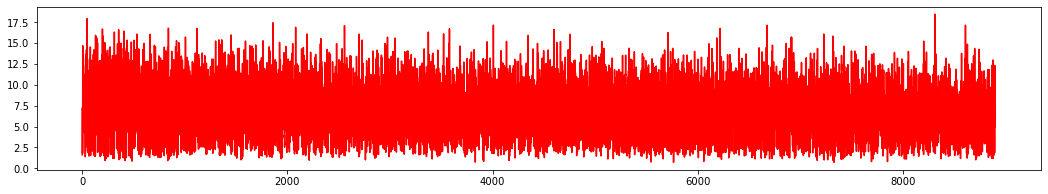

In [26]:
plt.figure(figsize=(18,3)) 
plt.plot(loss_lst, c='red')
plt.show()

## Test our Artificial Neural Network

**Convert Numpy arrays to Pytorch tensors for testing set.**

In [35]:
# this is for the test set.
tensor_X_test = torch.from_numpy(test_X).float() 
tensor_y_test = torch.from_numpy(test_y1).float() 
print(tensor_X_test.shape, tensor_y_test.shape)

tensor_y_test = tensor_y_test.unsqueeze(1)
print(tensor_X_test.shape, tensor_y_test.shape)

torch.Size([1044, 4]) torch.Size([1044])
torch.Size([1044, 4]) torch.Size([1044, 1])


In [36]:
var_X_test = Variable(tensor_X_test)
var_y_test = Variable(tensor_y_test)

**Do predictions of the testing set and calculate the RMSE.**

In [37]:
predictions_test = model(var_X_test)

In [38]:
rmse_loss = torch.sqrt(loss_function(predictions_test, var_y_test))

C:\Python38\lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1044, 1])) that is different to the input size (torch.Size([1044, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [39]:
rmse_loss

tensor(9.5373, grad_fn=<SqrtBackward0>)

**The Root Mean Square Error of the testing set is 2.8, and since it is similar to the RMSE of the training set, we can conclude that there is not overfitting, perfect! An RMSE of 2.8 means that on average our model will do a prediction with a ± 2.8 error of miles per gallon. This is considered a satisfying result because 2.8 represents 12% out of the MPG average of our complete dataset and because 2.8 is lower than the MPG standard deviation of our whole dataset.**

## Plot the predictions against target values

In [40]:
y_pred = predictions_test.tolist()

In [41]:
y_real = var_y_test.tolist()

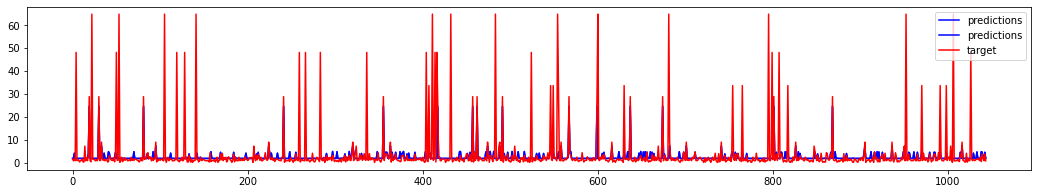

In [42]:
plt.figure(figsize=(18,3)) 
plt.plot(y_pred, c='blue', label="predictions")
plt.plot(y_real, c='red', label="target")
plt.legend(loc="upper right")
plt.show()

## Predict JUST one data with our model

In [34]:
data_x = var_X_test[0]
data_x

tensor([0.1390, 0.4286, 0.4717, 0.0000])

In [35]:
prediction = model(data_x)

In [36]:
print("Target value: ", var_y_test[0])
print("Prediction: ", prediction)

Target value:  tensor([1.5400])
Prediction:  tensor([1.7888, 1.7909], grad_fn=<ViewBackward0>)


**When predicting only one data, the first one of the testing set, it can be seen that the target or real value is 28 MPG and that the prediction is 26.7. The prediction is really close and has an absolute error of 1.3 MPG or a percentage error of 4.6%.**